In [1]:
import numpy
in_1=numpy.load(r'C:\Users\e-wel\Desktop\xinhua_11\xinhua_11_unnormalized.npy',allow_pickle=True).item()
len(in_1[5])


2340

In [2]:
total=[]
for seg in in_1.keys():
    seg_record=[]
    for day in range(13):
        seg_record.append(in_1[seg][day*180:(day+1)*180][119:135])
    total.append(seg_record)
total=numpy.array(total)

In [19]:
total.shape

(8, 13, 16)

In [3]:
extracted_vectors={}
seg_list=list(in_1.keys())
for seg in range(8):
    extracted_vectors[str(seg_list[seg])]=numpy.around(numpy.mean(total[seg],axis=0),2)

In [25]:
numpy.save(r'C:\Users\e-wel\Desktop\xinhua_11\120to135_cluster_input.npy',extracted_vectors)

In [27]:
extracted_vectors

{'5': array([128.62, 128.23, 152.54, 152.08, 160.23, 171.23, 167.  , 168.08,
        151.62, 127.  , 105.31,  94.46,  95.85,  99.08, 107.46, 112.38]),
 '3': array([121.38, 121.  , 115.31, 141.  , 169.31, 184.85, 165.77, 151.38,
        133.77, 126.23, 112.85,  94.  ,  87.77,  89.77,  83.54,  81.62]),
 '43': array([52.92, 57.23, 53.08, 51.46, 52.15, 50.69, 49.31, 50.77, 50.46,
        47.77, 53.54, 46.46, 54.15, 49.31, 49.92, 49.69]),
 '44': array([37.38, 39.38, 39.15, 38.54, 38.54, 39.62, 39.92, 39.85, 39.  ,
        39.15, 39.  , 40.  , 40.77, 38.69, 39.46, 39.69]),
 '138': array([146.  , 141.46, 141.69, 151.08, 151.  , 148.  , 144.46, 138.69,
        128.38, 125.77, 114.92, 104.85, 104.92, 103.15,  97.69,  91.92]),
 '34': array([82.38, 86.62, 81.85, 85.69, 78.08, 83.69, 88.23, 92.38, 88.08,
        80.31, 70.31, 71.77, 81.85, 79.15, 72.54, 73.77]),
 '32': array([174.46, 161.85, 149.15, 144.77, 166.23, 180.85, 180.46, 179.92,
        174.77, 162.85, 160.77, 158.77, 137.85, 136.77, 135

In [7]:
extracted_vectors_new=[]
for seg in extracted_vectors:
    record=extracted_vectors[seg]
    transformed_record=[]
    for i in range(1,16):
        transformed_record.append(record[i]-record[i-1])
    extracted_vectors_new.append(transformed_record)

In [13]:
import matplotlib.pyplot as plt

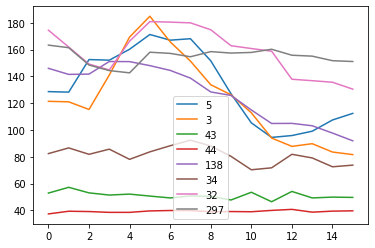

In [29]:
for seg in seg_list:
    plt.plot([i for i in range(16)],extracted_vectors[str(seg)],label=seg)
plt.legend()
plt.show()


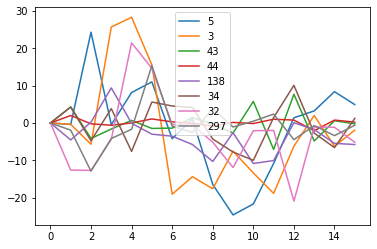

In [32]:
for index,seg in enumerate(seg_list):
    plt.plot([i for i in range(16)],extracted_vectors_new[index],label=seg)
plt.legend()
plt.show()

In [10]:
numpy.array(extracted_vectors_new)

array([[ -0.39,  24.31,  -0.46,   8.15,  11.  ,  -4.23,   1.08, -16.46,
        -24.62, -21.69, -10.85,   1.39,   3.23,   8.38,   4.92],
       [ -0.38,  -5.69,  25.69,  28.31,  15.54, -19.08, -14.39, -17.61,
         -7.54, -13.38, -18.85,  -6.23,   2.  ,  -6.23,  -1.92],
       [  4.31,  -4.15,  -1.62,   0.69,  -1.46,  -1.38,   1.46,  -0.31,
         -2.69,   5.77,  -7.08,   7.69,  -4.84,   0.61,  -0.23],
       [  2.  ,  -0.23,  -0.61,   0.  ,   1.08,   0.3 ,  -0.07,  -0.85,
          0.15,  -0.15,   1.  ,   0.77,  -2.08,   0.77,   0.23],
       [ -4.54,   0.23,   9.39,  -0.08,  -3.  ,  -3.54,  -5.77, -10.31,
         -2.61, -10.85, -10.07,   0.07,  -1.77,  -5.46,  -5.77],
       [  4.24,  -4.77,   3.84,  -7.61,   5.61,   4.54,   4.15,  -4.3 ,
         -7.77, -10.  ,   1.46,  10.08,  -2.7 ,  -6.61,   1.23],
       [-12.61, -12.7 ,  -4.38,  21.46,  14.62,  -0.39,  -0.54,  -5.15,
        -11.92,  -2.08,  -2.  , -20.92,  -1.08,  -1.15,  -5.16],
       [ -1.93, -12.92,  -4.15,  -1.69,  

In [5]:
extracted_vectors_new_dict={}
for index,seg in enumerate(seg_list):
    extracted_vectors_new_dict[seg]=extracted_vectors_new[index]

In [8]:
from utils.cluster import cluster
cluster(extracted_vectors_new_dict,0.7)

0.438
0.004
0.315
-0.241
0.282
-0.182
0.539
0.7
cluster 0:[5]
cluster 1:[3]
cluster 2:[43]
cluster 3:[44]
cluster 4:[138]
cluster 5:[34]
cluster 6:[32]
cluster 7:[297]


In [11]:
extracted_vectors_normalized=[]
for seg in extracted_vectors:
    record=extracted_vectors[seg]
    max_val=max(record)
    min_val=min(record)
    max_val_arr=numpy.array([max_val for i in range(16)])
    min_val_arr=numpy.array([min_val for i in range(16)])
    record=(record-min_val_arr)/(max_val_arr-min_val_arr)
    extracted_vectors_normalized.append(record)

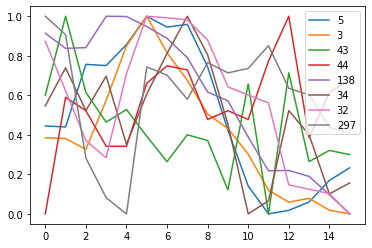

In [14]:
for index,seg in enumerate(seg_list):
    plt.plot([i for i in range(16)],extracted_vectors_normalized[index],label=seg)
plt.legend()
plt.show()

In [15]:
extracted_vectors_normalized_dict={}
for index,seg in enumerate(seg_list):
    extracted_vectors_normalized_dict[seg]=extracted_vectors_normalized[index]

In [18]:
from utils.cluster import cluster
cluster(extracted_vectors_normalized_dict,0.75)

0.966
0.737
0.793
0.844
0.895
0.875
0.884
0.75
cluster 0:[5, 3]
cluster 1:[43, 44, 138, 34, 32, 297]


In [22]:
data_normalized=[]
seg_max_min=[]
for seg,seg_record in in_1.items():
    max_val=max(seg_record)
    min_val=min(seg_record)
    seg_max_min.append((max_val,min_val))
    max_val_arr=numpy.array([max_val for i in range(2340)])
    min_val_arr=numpy.array([min_val for i in range(2340)])
    seg_record=numpy.around((seg_record-min_val_arr)/(max_val_arr-min_val_arr),2)
    data_normalized.append(seg_record)

In [25]:
in_1=[]
in_2=[]
in_3=[]
in_4=[]
out=[]
for seg_record in data_normalized:
    output=[]
    input_4=[]
    input_1=[]
    input_2=[]
    input_3=[]
    for day in range(13):
        valid=seg_record[day*180:(day+1)*180] # a list
        input_1=numpy.concatenate((input_1,valid[0:176]))
        input_2=numpy.concatenate((input_2,valid[1:177]))
        input_3=numpy.concatenate((input_3,valid[2:178]))
        input_4=numpy.concatenate((input_4,valid[3:179]))
        output=numpy.concatenate((output,valid[4:180]))
    in_1.append(input_1)
    in_2.append(input_2)
    in_3.append(input_3)
    in_4.append(input_4)
    out.append(output)

In [27]:
result_1=numpy.transpose(in_1)
result_2=numpy.transpose(in_2)
result_3=numpy.transpose(in_3)
result_4=numpy.transpose(in_4)
result_5=numpy.transpose(out)
numpy.save(r'C:\Users\e-wel\Desktop\xinhua_11\xinhua_11_all\input_1.npy',result_1)
numpy.save(r'C:\Users\e-wel\Desktop\xinhua_11\xinhua_11_all\input_2.npy',result_2)
numpy.save(r'C:\Users\e-wel\Desktop\xinhua_11\xinhua_11_all\input_3.npy',result_3)
numpy.save(r'C:\Users\e-wel\Desktop\xinhua_11\xinhua_11_all\input_4.npy',result_4)
numpy.save(r'C:\Users\e-wel\Desktop\xinhua_11\xinhua_11_all\out.npy',result_5)

In [28]:
seg_max_min

[(540.0, 32.0),
 (356.0, 46.0),
 (107.0, 23.0),
 (64.0, 23.0),
 (223.0, 63.0),
 (217.0, 25.0),
 (346.0, 47.0),
 (440.0, 44.0)]

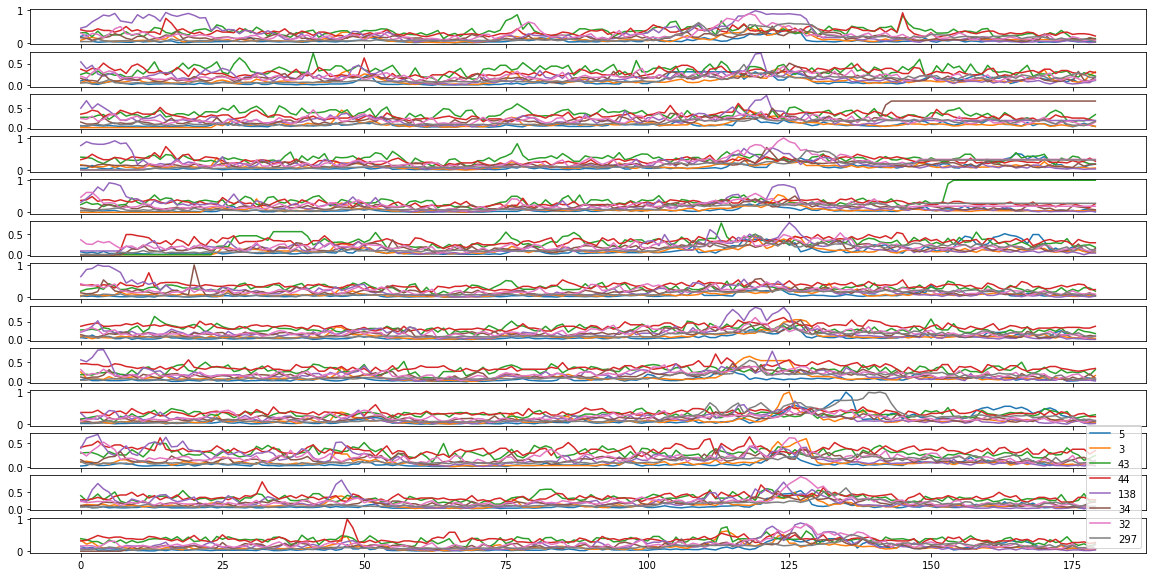

In [33]:
record=[]
for day in range(13):
    day_record=[]
    for index,seg in enumerate(seg_list):
        day_record.append(data_normalized[index][day*180:(day+1)*180])
    # record.append(day_record)
    plt.subplot(13,1,day+1)
    plt.rcParams['figure.figsize']=(20,10)
    for index,seg in enumerate(seg_list):
        plt.plot([i for i in range(180)],day_record[index],label=str(seg))
plt.legend()
plt.show()